In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 72.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 85.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.9 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 78.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 86.2 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 87.8 MB/s eta 0:00:000m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 86.5 MB/s eta 0:00:00m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 87.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install ipywidgets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)


In [ ]:
!pip install transformers tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 84.0 MB/s eta 0:00:00


In [ ]:
!pip install datasets

In [ ]:
dataset = load_dataset("cardiffnlp/super_tweeteval", "tweet_hate")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['gold_label', 'text'],
        num_rows: 5019
    })
    test: Dataset({
        features: ['gold_label', 'text'],
        num_rows: 1433
    })
    validation: Dataset({
        features: ['gold_label', 'text'],
        num_rows: 716
    })
})


In [ ]:
test_ds = dataset['test']

In [ ]:
test_ds[0]

{'gold_label': 7,
 'text': "If you're angry and hate someone because of the color of their skin and you need to shoot someone then you're a punkass bitch. You're NOT SUPERIOR. YOU ARE A WEAK PUNKASS BITCH. FUCK YOU AND YOUR GUNS."}

In [ ]:
import numpy as np
import pandas as pd
tweeteval = pd.DataFrame(dataset['test'])

In [ ]:
tweeteval.head()

,gold_label,text
0,7,If you're angry and hate someone because of th...
1,7,Catch my interview in @gaystarnews on how tran...
2,7,@user Can an asian man get that pass
3,7,@user @user @user @user @danroan My point was ...
4,7,A new way to look at impeachment: • A majority...


In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")

    # Get the name of the GPU
    gpu_name = torch.cuda.get_device_name(0)  # Get the name of the first GPU
    print(f"GPU Name: {gpu_name}")
else:
    print("CUDA is not available.")


CUDA is available!
GPU Name: NVIDIA RTX A5000


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm
from datasets import load_dataset
import pandas as pd

# Load the tweet_hate dataset
# ds = load_dataset("cardiffnlp/super_tweeteval", "tweet_hate")

# # Convert the 'test' split to a pandas DataFrame
# df = pd.DataFrame(ds['test'])

# Initialize label mappings
label_mappings = {
    "facebook_roberta": {0: 'Neutral', 1: 'Hate'},
    "hatexplain": {0: 'Hate', 1: 'Neutral', 2: 'Offensive'},
    "distilroberta": {0: 'Hate', 1: 'Offensive', 2: 'Neutral'},
    "cardiff_roberta": {0: "hate_gender", 1: "hate_race", 2: "hate_sexuality",
                        3: "hate_religion", 4: "hate_origin", 5: "hate_disability",
                        6: "hate_age", 7: "Neutral"},
    "dehatebert": {0: 'Neutral', 1: 'Hate'}
}

# Initialize the list of models
models = {
    "facebook_roberta": "facebook/roberta-hate-speech-dynabench-r4-target",
    "hatexplain": "Hate-speech-CNERG/bert-base-uncased-hatexplain",
    "distilroberta": "badmatr11x/distilroberta-base-offensive-hateful-speech-text-multiclassification",
    "cardiff_roberta": "cardiffnlp/twitter-roberta-large-hate-latest",
    "dehatebert": "Hate-speech-CNERG/dehatebert-mono-english",
}

# Function to run each model and get predictions
def run_model(model_name, model_path, text_list):
    print(f"Running model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    model = model.to(device)

    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt")
    inputs = inputs.to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    probabilities = torch.softmax(outputs.logits, dim=-1)
    predictions = torch.argmax(probabilities, dim=-1)

    # Convert the predictions tensor to a list
    predictions_list = predictions.tolist()

    # Map the numeric labels to their string representations
    return [label_mappings[model_name][pred] for pred in predictions_list]

# Run all models and append the predictions as new columns to the DataFrame
for model_name, model_path in tqdm(models.items(), desc="Running models"):
    tweeteval[model_name] = run_model(model_name, model_path, tweeteval['text'].tolist())

# Display the updated DataFrame with model predictions
tweeteval.head()

Running models:   0%|                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

Running model: facebook_roberta


Running models:  20%|██████████████████████████████▍                                                                                                                         | 1/5 [00:03<00:15,  3.85s/it]

Running model: hatexplain


Running models:  40%|████████████████████████████████████████████████████████████▊                                                                                           | 2/5 [00:06<00:09,  3.27s/it]

Running model: distilroberta


Running models:  60%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 3/5 [00:08<00:05,  2.76s/it]

Running model: cardiff_roberta


Running models:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 4/5 [00:20<00:06,  6.25s/it]

Running model: dehatebert


Running models: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.67s/it]


,gold_label,text,facebook_roberta,hatexplain,distilroberta,cardiff_roberta,dehatebert
0,Neutral,If you're angry and hate someone because of th...,Hate,Neutral,Offensive,Neutral,Hate
1,Neutral,Catch my interview in @gaystarnews on how tran...,Neutral,Neutral,Hate,Neutral,Hate
2,Neutral,@user Can an asian man get that pass,Neutral,Neutral,Neutral,Neutral,Hate
3,Neutral,@user @user @user @user @danroan My point was ...,Neutral,Neutral,Neutral,Neutral,Neutral
4,Neutral,A new way to look at impeachment: • A majority...,Neutral,Neutral,Neutral,Neutral,Neutral


In [ ]:
# Define the label mapping
label_mappings = {
    0: "hate_gender",
    1: "hate_race",
    2: "hate_sexuality",
    3: "hate_religion",
    4: "hate_origin",
    5: "hate_disability",
    6: "hate_age",
    7: "Neutral"
}

# Replace the 'gold_label' column values with the respective class labels using the mapping
tweeteval['gold_label'] = tweeteval['gold_label'].map(label_mappings)

# Display the updated DataFrame
tweeteval.head()

,gold_label,text,facebook_roberta,hatexplain,distilroberta,cardiff_roberta,dehatebert
0,Neutral,If you're angry and hate someone because of th...,Hate,Neutral,Offensive,Neutral,Hate
1,Neutral,Catch my interview in @gaystarnews on how tran...,Neutral,Neutral,Hate,Neutral,Hate
2,Neutral,@user Can an asian man get that pass,Neutral,Neutral,Neutral,Neutral,Hate
3,Neutral,@user @user @user @user @danroan My point was ...,Neutral,Neutral,Neutral,Neutral,Neutral
4,Neutral,A new way to look at impeachment: • A majority...,Neutral,Neutral,Neutral,Neutral,Neutral


In [ ]:
tweeteval.to_excel('SuperTweetEval_Results.xlsx',index=False)

In [2]:
import numpy as np
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/_Immigration LatinX'

/content/drive/.shortcut-targets-by-id/15qBLFlUf-o-58bi_3Y6CDVFEEswJT6DT/_Immigration LatinX


In [4]:
data = pd.read_excel('SuperTweetEval_Results.xlsx')
data.head()

,gold_label,text,facebook_roberta,hatexplain,distilroberta,cardiff_roberta,dehatebert
0,Neutral,If you're angry and hate someone because of th...,Hate,Neutral,Offensive,Neutral,Hate
1,Neutral,Catch my interview in @gaystarnews on how tran...,Neutral,Neutral,Hate,Neutral,Hate
2,Neutral,@user Can an asian man get that pass,Neutral,Neutral,Neutral,Neutral,Hate
3,Neutral,@user @user @user @user @danroan My point was ...,Neutral,Neutral,Neutral,Neutral,Neutral
4,Neutral,A new way to look at impeachment: • A majority...,Neutral,Neutral,Neutral,Neutral,Neutral


In [5]:
data['hatexplain'].value_counts()

,count
hatexplain,
Neutral,1160
Offensive,244
Hate,29


In [6]:
data['gold_label'].value_counts()

,count
gold_label,
Neutral,1016
hate_gender,162
hate_race,114
hate_sexuality,52
hate_religion,49
hate_origin,34
hate_disability,4
hate_age,2


In [7]:
df = data.copy()
df.rename(columns={'gold_label':'label'},inplace=True)
df.head()

,label,text,facebook_roberta,hatexplain,distilroberta,cardiff_roberta,dehatebert
0,Neutral,If you're angry and hate someone because of th...,Hate,Neutral,Offensive,Neutral,Hate
1,Neutral,Catch my interview in @gaystarnews on how tran...,Neutral,Neutral,Hate,Neutral,Hate
2,Neutral,@user Can an asian man get that pass,Neutral,Neutral,Neutral,Neutral,Hate
3,Neutral,@user @user @user @user @danroan My point was ...,Neutral,Neutral,Neutral,Neutral,Neutral
4,Neutral,A new way to look at impeachment: • A majority...,Neutral,Neutral,Neutral,Neutral,Neutral


In [8]:
df1=df.copy()
df1.head()

,label,text,facebook_roberta,hatexplain,distilroberta,cardiff_roberta,dehatebert
0,Neutral,If you're angry and hate someone because of th...,Hate,Neutral,Offensive,Neutral,Hate
1,Neutral,Catch my interview in @gaystarnews on how tran...,Neutral,Neutral,Hate,Neutral,Hate
2,Neutral,@user Can an asian man get that pass,Neutral,Neutral,Neutral,Neutral,Hate
3,Neutral,@user @user @user @user @danroan My point was ...,Neutral,Neutral,Neutral,Neutral,Neutral
4,Neutral,A new way to look at impeachment: • A majority...,Neutral,Neutral,Neutral,Neutral,Neutral


Cardiff Roberta - Accuracy: 0.9874389392882066, F1 Score: 0.8997535288247391


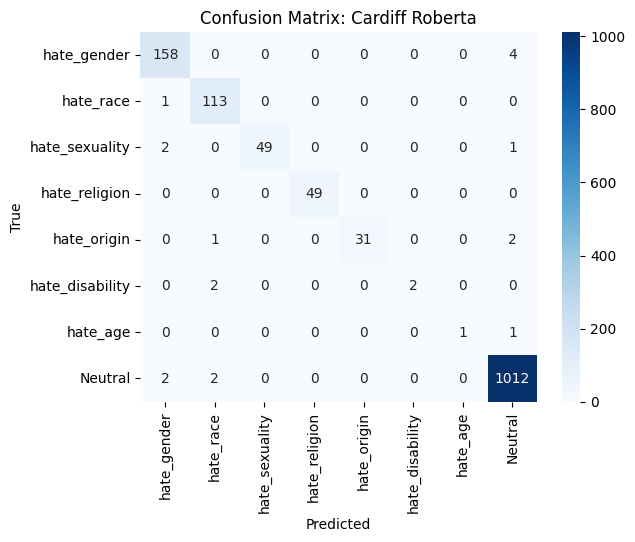

In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the simplified labels to numeric values using the same mapping as before
label_mapping = {0: "hate_gender", 1: "hate_race", 2: "hate_sexuality",
                 3: "hate_religion", 4: "hate_origin", 5: "hate_disability",
                 6: "hate_age", 7: "Neutral"}

df1 = df.copy()

# Map the 'label' and 'cardiff_roberta' columns to numeric values using the label mapping
reverse_label_mapping = {v: k for k, v in label_mapping.items()}  # Reverse the mapping for numeric conversion

df1['true_label'] = df1['label'].map(reverse_label_mapping)  # Reverse mapping to get numeric labels
df1['cardiff_roberta_numeric'] = df1['cardiff_roberta'].map(reverse_label_mapping)

# Calculate accuracy, F1 score, and confusion matrix
accuracy_cardiff = accuracy_score(df1['true_label'], df1['cardiff_roberta_numeric'])
f1_cardiff = f1_score(df1['true_label'], df1['cardiff_roberta_numeric'], average='macro')

# Print accuracy and F1 score
print(f"Cardiff Roberta - Accuracy: {accuracy_cardiff}, F1 Score: {f1_cardiff}")

# Confusion Matrix for cardiff_roberta
cm_cardiff = confusion_matrix(df1['true_label'], df1['cardiff_roberta_numeric'])

# Plot Confusion Matrix with proper tick labels
sns.heatmap(cm_cardiff, annot=True, fmt="d", cmap="Blues",
            xticklabels=[label_mapping[i] for i in range(len(label_mapping))],
            yticklabels=[label_mapping[i] for i in range(len(label_mapping))])

plt.title("Confusion Matrix: Cardiff Roberta")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

<ipython-input-13-5c3329924018>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['true_label'].fillna(0, inplace=True)
<ipython-input-13-5c3329924018>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Facebook Roberta - Accuracy: 0.732728541521284, F1 Score: 0.7194282632422443
Dehatebert - Accuracy: 0.7124912770411723, F1 Score: 0.6939177139065157
HateXplain - Accuracy: 0.8269364968597348, F1 Score: 0.7633045609548167
DistilRoberta - Accuracy: 0.7236566643405443, F1 Score: 0.7103632020579409


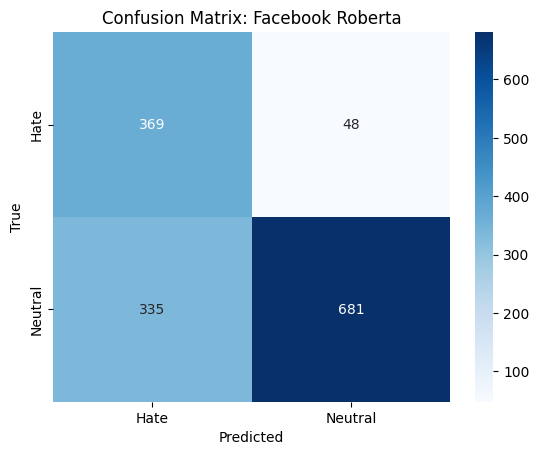

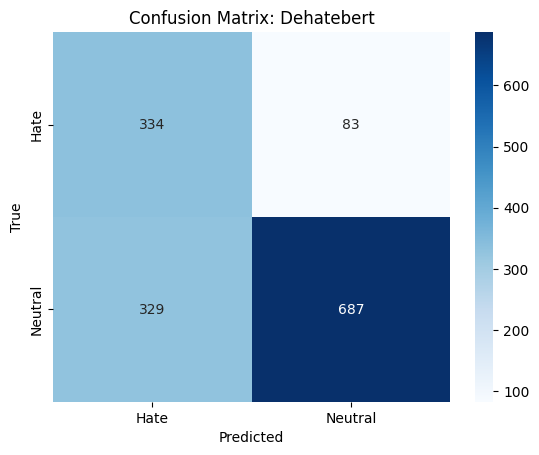

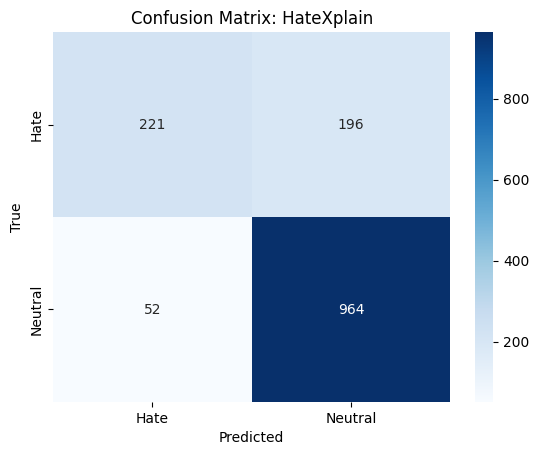

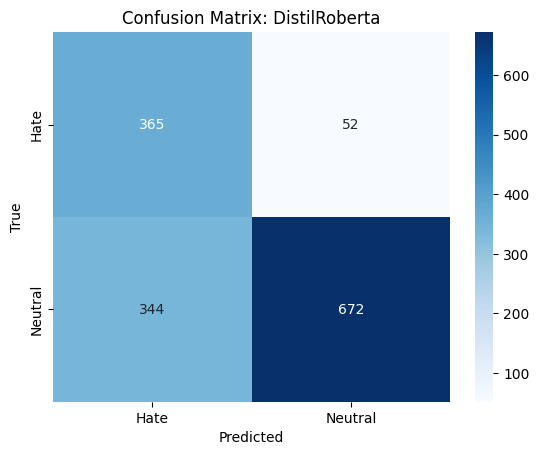

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df1=df.copy()
# Mapping for cardiff_roberta, collapsing all hate categories into 'Hate'
label_mapping_cardiff = {
    "hate_gender": "Hate",
    "hate_race": "Hate",
    "hate_sexuality": "Hate",
    "hate_religion": "Hate",
    "hate_origin": "Hate",
    "hate_disability": "Hate",
    "hate_age": "Hate",
    "Neutral": "Neutral"
}
df1['true_label'] = df1['label'].map(label_mapping_cardiff)
# df1 = df[df['label'] != '1'] Already done above

label_mapping = {'Hate': 0, 'Neutral': 1}

df1['true_label'] = df1['label'].map(label_mapping)
df1['true_label'].fillna(0, inplace=True)


# Replace 'Offensive' with 'Hate' in the 'hatexplain' column
df1['hatexplain'].replace('Offensive', 'Hate', inplace=True)

# Replace 'Offensive' with 'Hate' in the 'hatexplain' column
df['distilroberta'].replace('Offensive', 'Hate', inplace=True)

df1['hatexplain_numeric'] = df1['hatexplain'].map(label_mapping)
df1['distilroberta_numeric'] = df1['distilroberta'].map(label_mapping)

df1['facebook_roberta_numeric'] = df1['facebook_roberta'].map(label_mapping)
df1['dehatebert_numeric'] = df1['dehatebert'].map(label_mapping)
#accuracy
accuracy_facebook = accuracy_score(df1['true_label'], df1['facebook_roberta_numeric'])
accuracy_dehatebert = accuracy_score(df1['true_label'], df1['dehatebert_numeric'])

# Calculate accuracy for facebook_roberta, hatexplain, and distilroberta
accuracy_hatexplain = accuracy_score(df1['true_label'], df1['hatexplain_numeric'])
accuracy_distilroberta = accuracy_score(df1['true_label'], df1['distilroberta_numeric'])

# Calculate F1 Scores (macro-averaged to account for multiple classes)
f1_hatexplain = f1_score(df1['true_label'], df1['hatexplain_numeric'], average='macro')
f1_distilroberta = f1_score(df1['true_label'], df1['distilroberta_numeric'], average='macro')

#F1
f1_facebook = f1_score(df1['true_label'], df1['facebook_roberta_numeric'], average='macro')
f1_dehatebert = f1_score(df1['true_label'], df1['dehatebert_numeric'], average='macro')

#Print scores
print(f"Facebook Roberta - Accuracy: {accuracy_facebook}, F1 Score: {f1_facebook}")
print(f"Dehatebert - Accuracy: {accuracy_dehatebert}, F1 Score: {f1_dehatebert}")

# Print Accuracy and F1 Scores
print(f"HateXplain - Accuracy: {accuracy_hatexplain}, F1 Score: {f1_hatexplain}")
print(f"DistilRoberta - Accuracy: {accuracy_distilroberta}, F1 Score: {f1_distilroberta}")

# Confusion Matrix for facebook_roberta
cm_facebook = confusion_matrix(df1['true_label'], df1['facebook_roberta_numeric'])
sns.heatmap(cm_facebook, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix: Facebook Roberta")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for dehatebert
cm_dehatebert = confusion_matrix(df1['true_label'], df1['dehatebert_numeric'])
sns.heatmap(cm_dehatebert, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix: Dehatebert")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for hatexplain
cm_hatexplain = confusion_matrix(df1['true_label'], df1['hatexplain_numeric'])
sns.heatmap(cm_hatexplain, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix: HateXplain")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for distilroberta
cm_distilroberta = confusion_matrix(df1['true_label'], df1['distilroberta_numeric'])
sns.heatmap(cm_distilroberta, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix: DistilRoberta")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()